<img src="https://admissions.ntust.edu.tw/front_index/images/logo.png" alt="drawing" width="600"/>
<hr>
<h1><center>MACHINE LEARNING : HOMEWORK 1</center></h1>
<h1><center>Data 1 : Wealth prediction</center></h1>
<h4>Hector LANDES - M10601810</h4>
<h4>Machine Learning - CS5087701</h4>

<hr>
<div id="Import the libraries">
    <h2>Import the libraries</h2>
</div>

In [3]:
#!conda install -c conda-forge pydotplus -y
#pip install graphviz
#pip install pydotplus
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import pydotplus as py
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.model_selection import cross_val_score
import graphviz
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import model_selection
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\Hector Landes\graphviz-2.38\release\bin'
%matplotlib inline 

<hr>
<div id="Import the data">
    <h2>Import the data</h2>
</div>

In [184]:
path = r'C:\Users\Hector Landes\Desktop\Data Science Projects\20191005 Homework_1_ML\2. Prepared Data\adult.csv'

In [185]:
data = pd.read_csv (path, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
                           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
                                 "hours-per-week", "native-country", "wealth"],
                   index_col=False)

<hr>
<div id="Data checking">
    <h3>Data checking</h3>
</div>

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
wealth            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [187]:
len(data)

32561

In [188]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wealth
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<hr>
<div id="Data preprocessing">
    <h2>Data preprocessing</h2>
</div>

<h3>ID3</h3> (Iterative Dichotomiser 3) was developed in 1986 by Ross Quinlan. The algorithm creates a multiway tree, finding for each node (i.e. in a greedy manner) the categorical feature that will yield the largest information gain for categorical targets. Trees are grown to their maximum size and then a pruning step is usually applied to improve the ability of the tree to generalise to unseen data.

<h3>C4.5</h3> is the successor to ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. C4.5 converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules. These accuracy of each rule is then evaluated to determine the order in which they should be applied. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.

<h3>C5.0</h3> is Quinlan’s latest version release under a proprietary license. It uses less memory and builds smaller rulesets than C4.5 while being more accurate.

<h3>CART</h3> (Classification and Regression Trees) is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.

scikit-learn uses an optimised version of the CART algorithm; however, scikit-learn implementation does not support categorical variables for now.

<h3>Drop missing values rows</h3>

In [189]:
data.isin([' ?', '? ', '?', "NaN"]).any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
wealth            False
dtype: bool

In [190]:
data = data[(data.astype(str) != ' ?').all(axis=1)]

In [191]:
len(data)

30162

Because, CART does not support categorical variables, I will create dummies for each categorical variables.
Let's start with: 
<ul>
<b> Tranform all the categorical values into dummies values </b> 
</ul>

In [192]:
data = pd.get_dummies(data, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', "native-country"])

In [193]:
bins = pd.cut(data['fnlwgt'], 20)
bins = bins.cat.codes
data[data.columns[2]] = bins

In [194]:
data.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,wealth,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,0,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,0,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,2,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,3,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,4,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,37,284582,3,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,49,160187,1,0,0,16,<=50K,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,52,209642,2,0,0,45,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,31,45781,0,14084,0,50,>50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9,42,159449,1,5178,0,40,>50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0


<ul>
<b>Check the quantity of observations for capital loss and the distribution of these losses </b></ul>

In [195]:
non_zero_value = data.loc[data["capital-loss"] != 0]

In [196]:
print("There is %d observations with a capital loss, which is only %0.2f"
      % (non_zero_value["capital-loss"].count()
         , non_zero_value["capital-loss"].count()/len(data)*100)
      , '% of the total observations')

There is 1427 observations with a capital loss, which is only 4.73 % of the total observations


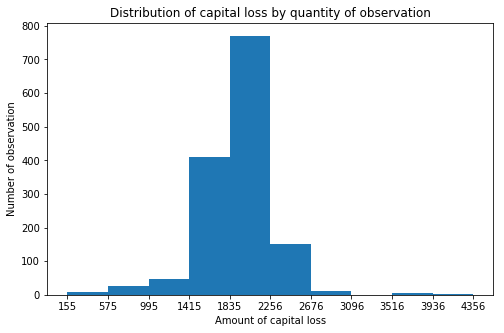

In [197]:
count, bin_edges = np.histogram(non_zero_value["capital-loss"], bins = 10)

non_zero_value["capital-loss"].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Distribution of capital loss by quantity of observation') # add a title to the histogram
plt.ylabel('Number of observation') # add y-label
plt.xlabel('Amount of capital loss') # add x-label

plt.show()

Because the quantity of observation with an effective capital loss is very small, and because the amount of loss is evenly distributed between 1415$ and 2676$, I will consider the attribute capital loss as a binary attributes, such as capital loss = 0 when there is no loss and = 1 when there is a loss.
In such a way I can keep the information of this attributes for the prediction without influencing too much the prediction with this continuous variable.

In [198]:
data.loc[data["capital-loss"] != 0, ["capital-loss"]] = 1

<ul>
<b>Check the quantity of observations for capital gain and the distribution of these gains</b>
</ul>

In [199]:
non_zero_value = data.loc[data["capital-gain"] != 0]

In [200]:
print("There is %d observations with a capital gain, which is only %0.2f"
      % (non_zero_value["capital-gain"].count()
         , non_zero_value["capital-gain"].count()/len(data)*100)
      , '% of the total observations')

There is 2538 observations with a capital gain, which is only 8.41 % of the total observations


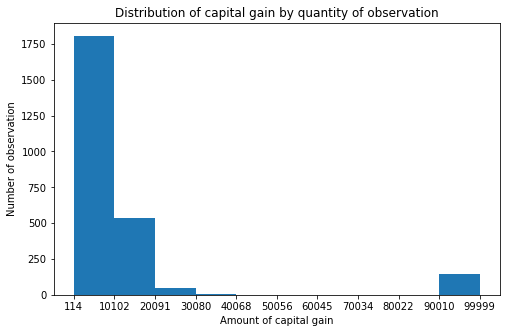

In [201]:
count, bin_edges = np.histogram(non_zero_value["capital-gain"], bins = 10)

non_zero_value["capital-gain"].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Distribution of capital gain by quantity of observation') # add a title to the histogram
plt.ylabel('Number of observation') # add y-label
plt.xlabel('Amount of capital gain') # add x-label

plt.show()

WIth the same reasoning as capital loss, I will create a binary attribute with capital gain

In [202]:
data.loc[data["capital-gain"] != 0, ["capital-gain"]] = 1

<ul>
<b>Check the attributes fnlwgt</b>
</ul>

According to the data source, fnlwgt represents the final weight. In other words, this is the number of people the census believes the entry represents. Therefore, I will delete it.

In [203]:
data = data.drop(['fnlwgt'], axis=1)

<ul>
<b>Check the target varaibles, wealth</b>
</ul>

In [204]:
data['bi_wealth'] = data.apply(lambda row: 1 if '>50K'in row['wealth'] else 0, axis=1)

In [205]:
data['bi_wealth'].value_counts()

0    22654
1     7508
Name: bi_wealth, dtype: int64

In [206]:
data['wealth'].value_counts()

 <=50K    22654
 >50K      7508
Name: wealth, dtype: int64

In [207]:
data = data.drop(['wealth'], axis=1)

In [208]:
data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,bi_wealth
0,39,0,1,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,0,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,38,2,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,3,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,4,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<ul>
<b> X </b> as the <b> Feature Matrix </b> 
</ul>

In [209]:
X = data[data.columns[:103]].values
X[0:2]

array([[39,  0,  1,  0, 40,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0,  0],
       [50,  0,  0,  0, 13,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0,  0]], dtype=int64)

<ul>
    <li> <b> Y </b> as the <b> Target Value </b> </li>
</ul>

In [210]:
Y = data["bi_wealth"]
Y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: bi_wealth, dtype: int64

Now we will split the data in training and testing data

In [211]:
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.3, random_state=3)

In [212]:
print('Feature matrix ->   Training:',X_trainset.shape,'   Testing:',X_testset.shape)
print('Target value   ->   Training:',Y_trainset.shape,'      Testing:',Y_testset.shape)

Feature matrix ->   Training: (21113, 103)    Testing: (9049, 103)
Target value   ->   Training: (21113,)       Testing: (9049,)


<hr>
<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>richTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>

In [213]:
richTree = DecisionTreeClassifier(criterion="entropy", max_depth = 9, min_samples_leaf = 100, min_impurity_decrease = 0.9)
richTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.9, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> Y_trainset </b>

In [214]:
richTree.fit(X_trainset,Y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.9, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>

In [215]:
predTree = richTree.predict(X_trainset)

In [216]:
print (predTree [0:5])
print (Y_trainset [0:5])

[0 0 0 0 0]
1275     1
7306     0
26683    1
32420    0
1966     0
Name: bi_wealth, dtype: int64


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
</div>

In [178]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_trainset, predTree))

DecisionTrees's Accuracy:  0.7532844295246384


<h3>Cross-validation for different tree depth</h3>

In [169]:
avg_scores = []
for max_depth in range(1, 20):
    richTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores = cross_val_score(richTree, X_trainset, Y_trainset, cv=5)
    avg_scores.append(scores.mean())
    print("Max depth: %d, Accuracy: %0.5f (+/- %0.5f)" % (max_depth, scores.mean(), scores.std()*2))

Max depth: 1, Accuracy: 0.75328 (+/- 0.00014)
Max depth: 2, Accuracy: 0.78317 (+/- 0.00219)
Max depth: 3, Accuracy: 0.80443 (+/- 0.00570)
Max depth: 4, Accuracy: 0.81715 (+/- 0.00943)
Max depth: 5, Accuracy: 0.82034 (+/- 0.01629)
Max depth: 6, Accuracy: 0.82283 (+/- 0.01076)
Max depth: 7, Accuracy: 0.82594 (+/- 0.01241)
Max depth: 8, Accuracy: 0.82718 (+/- 0.01698)
Max depth: 9, Accuracy: 0.82834 (+/- 0.01153)
Max depth: 10, Accuracy: 0.82552 (+/- 0.00842)
Max depth: 11, Accuracy: 0.82589 (+/- 0.00828)
Max depth: 12, Accuracy: 0.82291 (+/- 0.00855)
Max depth: 13, Accuracy: 0.82154 (+/- 0.00587)
Max depth: 14, Accuracy: 0.81707 (+/- 0.00635)
Max depth: 15, Accuracy: 0.81636 (+/- 0.00311)
Max depth: 16, Accuracy: 0.81338 (+/- 0.00158)
Max depth: 17, Accuracy: 0.81126 (+/- 0.00723)
Max depth: 18, Accuracy: 0.80990 (+/- 0.00714)
Max depth: 19, Accuracy: 0.80720 (+/- 0.00558)


In [170]:
avg_scores = pd.DataFrame(avg_scores) 

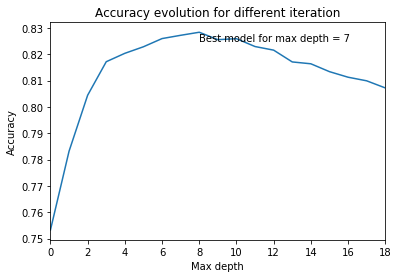

In [171]:
avg_scores.plot(kind='line', legend=None)
plt.title('Accuracy evolution for different iteration')
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.text(8, 0.825, 'Best model for max depth = 7')
plt.show() 

Cross validation look at recal and precision too -> Grid search max deoth and min sample leaf at the same time

Recal True Positives / (True Positives + False Negatives)

In [166]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [179]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = model_selection.KFold(n_splits=5, random_state=42)

results = model_selection.cross_validate(estimator=richTree,
                                          X=X_trainset,
                                          y=Y_trainset,
                                          cv=kfold,
                                          scoring=scoring)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undef

In [168]:
for max_depth in range(1, 20):
    richTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    results = model_selection.cross_validate(estimator=richTree,
                                          X=X_trainset,
                                          y=Y_trainset,
                                          cv=kfold,
                                          scoring=scoring)
    print("Max depth: %d, Recal: %0.2f" % (max_depth, recal[0,0]/(recal[1,1])))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undef

Max depth: 1, Recal: inf


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in longlong_scalars
  


Max depth: 2, Recal: inf


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in longlong_scalars
  


Max depth: 3, Recal: inf


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in longlong_scalars
  


Max depth: 4, Recal: inf


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in longlong_scalars
  


Max depth: 5, Recal: inf


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in longlong_scalars
  


Max depth: 6, Recal: inf


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in longlong_scalars
  


Max depth: 7, Recal: inf


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in longlong_scalars
  


Max depth: 8, Recal: inf


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in longlong_scalars
  


Max depth: 9, Recal: inf


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in longlong_scalars
  


Max depth: 10, Recal: inf


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in longlong_scalars
  


Max depth: 11, Recal: inf


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in longlong_scalars
  


Max depth: 12, Recal: inf


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in longlong_scalars
  


Max depth: 13, Recal: inf


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in longlong_scalars
  


Max depth: 14, Recal: inf


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in longlong_scalars
  


Max depth: 15, Recal: inf


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in longlong_scalars
  


Max depth: 16, Recal: inf


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in longlong_scalars
  


Max depth: 17, Recal: inf


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in longlong_scalars
  


Max depth: 18, Recal: inf
Max depth: 19, Recal: inf


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in longlong_scalars
  


<h3>Confusion Matrix</h3>

In [217]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


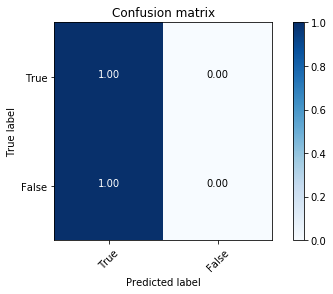

In [218]:
cnf_matrix = confusion_matrix(Y_trainset, predTree)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['True','False'],normalize= True,  title='Confusion matrix')

<hr>

<div id="visualization">
    <h2>Visualization</h2>
    Lets visualize the tree
</div>

In [141]:
dot_data = tree.export_graphviz(richTree, out_file=None, label='all', impurity=False, proportion=True, 
                               feature_names=list(X_trainset), class_names=['<=50K', '>50K'],
                               filled=False, rounded=True)
graph = graphviz.Source(dot_data)
graph

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

Post pruning de mon cul sa race

<h1><center>Source</center></h1> 
<li>https://itnext.io/learning-data-science-predict-adult-income-with-decision-tree-ae8dd57a76cc</li>
<li>https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084</li>
<li>https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html</li>
<li>https://arxiv.org/ftp/arxiv/papers/1810/1810.10076.pdf</li>
<li></li>
<li></li>
<li></li>


Post-pruning → Given full tree, convert each path in rules of conjunction and disjunction. Remove subtree for better generalization (decrease variance). More accurate than pre

Rule-Post Pruning
Translate each path in rules (conjunction and disjunction)
Select randomly one path
Remove this path
Re run the tree
If better accuracy, keep rules removed, if slightly worse, keep removed (principle of parsimony), see if decrease of size is more interesting to increase of inpuritty (determine the GainRatio instead of the Ratio)
If worse accuracy, re put the rules and try with another until max accuracy reached. 

https://statinfer.com/204-3-10-pruning-a-decision-tree-in-python/


<h1>(pre-pruning, post-pruning strategies, etc.) and for different datasets.

(e) (Bonus) Can you suggest any approach for re-building the tree or revising
the tree so that the prediction result is better? (hint: manually selecting some
particular attributes, transforming the attributes from categorical ones to
numerical ones or the other way around.)</h1>

Observation per country if, number of observation for one country is less than 1% of the total of observation, merge all teh country in same region together (Europe, Asie, Canada + USA, Mexico amerique du sus)
Faire la meme pour workclass, education, and all other variable

In [89]:
data['native-country'].value_counts() 

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [85]:
data['native-country'].unique().shape

(41,)

In [87]:
610/32651*100

1.8682429328351353

DecisionTreeClassifier(class_weight=None -< voir comment changer c, une repsrentation dans les donner rpersente combien en relatie

Corsse valide min_samples_leaf = 100, min_impurity_decrease = 0.9
Cross vaildation abefore modeling